In [10]:
!uname -a

Linux deedd418acba 5.15.109+ #1 SMP Fri Jun 9 10:57:30 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Импорт библиотек

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создание датасетов

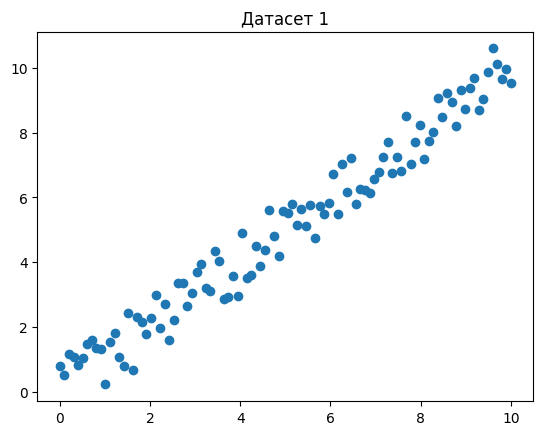

In [13]:
# Датасет 1
xs1 = np.linspace(0, 10, 100)
ys1 = xs1 + np.random.random(100)*2 - 1

plt.scatter(xs1, ys1)
plt.title("Датасет 1")
plt.show()

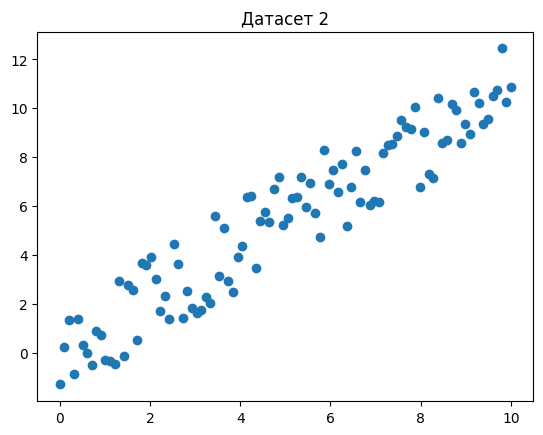

In [14]:
# Датасет 2
xs2 = np.linspace(0, 10, 100)
ys2 = 1.1*xs2 + np.random.random(100)*4 - 2

plt.scatter(xs2, ys2)
plt.title("Датасет 2")
plt.show()

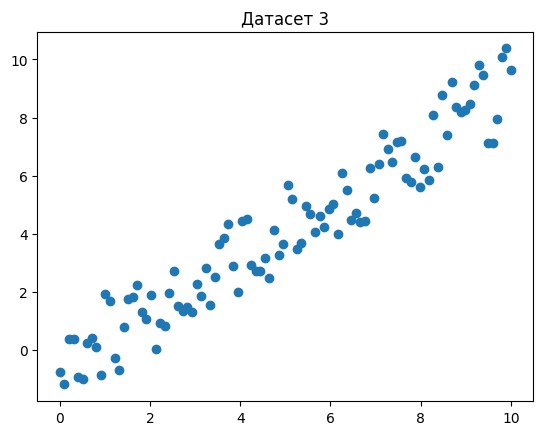

In [15]:
# Датасет 3
xs3 = np.linspace(0, 10, 100)
ys3 = 0.95*xs3 + np.random.random(100)*3 - 2

plt.scatter(xs3, ys3)
plt.title("Датасет 3")
plt.show()

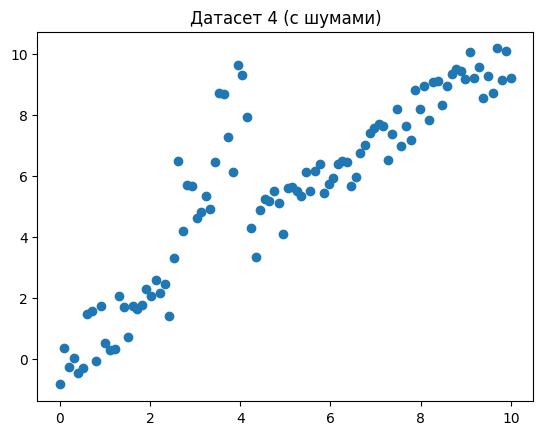

In [16]:
# Датасет 4 (с шумами)
xs4 = np.linspace(0, 10, 100)
ys4 = xs4 + np.random.random(100)*2 - 1
ys4[25:42] *= 2

plt.scatter(xs4, ys4)
plt.title("Датасет 4 (с шумами)")
plt.show()

# Обучение модели линейной регрессии на одном из датасетов

In [17]:
X_train = xs1.reshape(-1, 1)
y_train = ys1

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Анализ качества предсказания

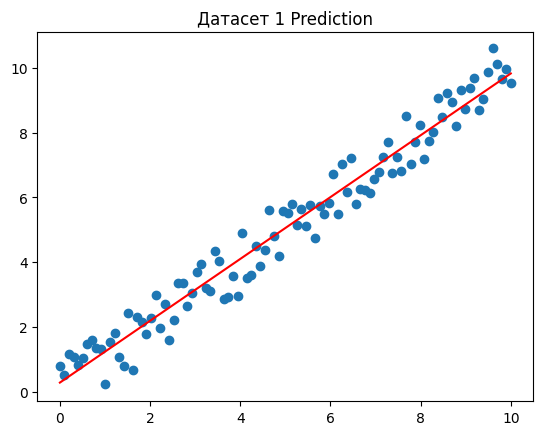

MSE for Датасет 1: 0.31
R2 for Датасет 1: 0.96
Coefficients for Датасет 1: 0.95



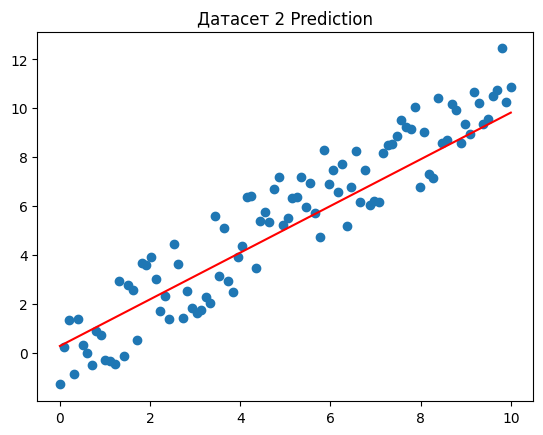

MSE for Датасет 2: 1.59
R2 for Датасет 2: 0.86
Coefficients for Датасет 2: 0.95



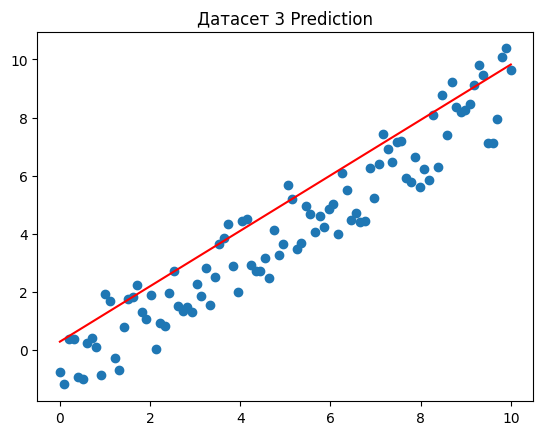

MSE for Датасет 3: 1.67
R2 for Датасет 3: 0.81
Coefficients for Датасет 3: 0.95



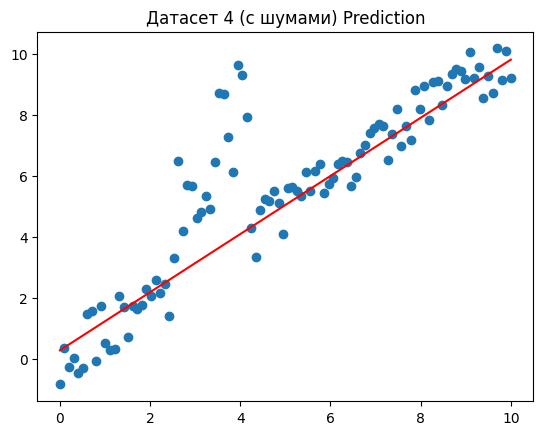

MSE for Датасет 4 (с шумами): 2.20
R2 for Датасет 4 (с шумами): 0.77
Coefficients for Датасет 4 (с шумами): 0.95



In [18]:
# Функция для анализа качества предсказания и записи данных
def analyze_predictions(xs, ys, dataset_name, idx):
    y_pred = model.predict(xs.reshape(-1, 1))

    np.savetxt(f"ys_{idx}.csv", ys, delimiter=",")
    np.savetxt(f"y_pred_{idx}.csv", y_pred, delimiter=",")

    plt.scatter(xs, ys)
    plt.plot(xs.reshape(-1, 1), y_pred, color="red")
    plt.title(f"{dataset_name} Prediction")
    plt.show()

    print(f"MSE for {dataset_name}: %.2f" % mean_squared_error(ys, y_pred))
    print(f"R2 for {dataset_name}: %.2f" % r2_score(ys, y_pred))
    print(f"Coefficients for {dataset_name}: %.2f" % model.coef_)
    print()

# Анализ качества предсказания на всех датасетах
analyze_predictions(xs1, ys1, "Датасет 1", 1)
analyze_predictions(xs2, ys2, "Датасет 2", 2)
analyze_predictions(xs3, ys3, "Датасет 3", 3)
analyze_predictions(xs4, ys4, "Датасет 4 (с шумами)", 4)

# Обнаружение проблемы на датасете 4 (с шумами)

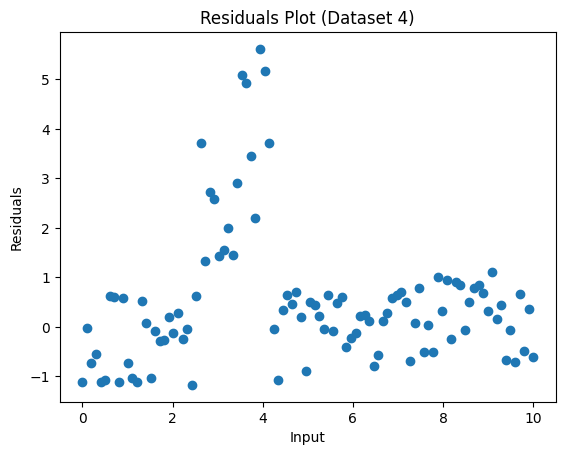

In [19]:
# Анализ остатков модели на датасете 4
y_pred4 = model.predict(xs4.reshape(-1, 1))
residuals = ys4 - y_pred4.flatten()

plt.scatter(xs4, residuals)
plt.xlabel("Input")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Dataset 4)")
plt.show()

**Судя по анализу остатков модели, то есть разницы между фактическими значениями и предсказанными значениями, остатки показывают некоторую структуру или паттерн, что может указывать на проблему в модели или неучтённые факторы в данных. Проведём тестирование данных.**

# Тестирование работы модели на всех 4 датасетах

In [20]:
%%writefile test_score.py
import numpy as np
import pytest
from sklearn.metrics import mean_squared_error, r2_score


@pytest.fixture
def load_ys():
    ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
    return ys

@pytest.fixture
def load_y_pred():
    y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]
    return(y_pred)

def test_mse(load_ys, load_y_pred):
    for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
        assert mean_squared_error(ys, y_pred) < 1, f"Test failed for file: ys_{idx}.csv"

def test_r2(load_ys, load_y_pred):
    for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
        assert r2_score(ys, y_pred) > 0.9, f"Test failed for file: ys_{idx}.csv"

Writing test_score.py


In [21]:
!cat test_score.py

import numpy as np
import pytest
from sklearn.metrics import mean_squared_error, r2_score


@pytest.fixture
def load_ys():
    ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
    return ys

@pytest.fixture
def load_y_pred():
    y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]
    return(y_pred)

def test_mse(load_ys, load_y_pred):
    for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
        assert mean_squared_error(ys, y_pred) < 1, f"Test failed for file: ys_{idx}.csv"

def test_r2(load_ys, load_y_pred):
    for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
        assert r2_score(ys, y_pred) > 0.9, f"Test failed for file: ys_{idx}.csv"


In [22]:
!pytest -v test_score.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.1, pluggy-1.3.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 2 items                                                              

test_score.py::test_mse FAILED                                           [ 50%]
test_score.py::test_r2 FAILED                                            [100%]

=================================== FAILURES ===================================
___________________________________ test_mse ___________________________________

load_ys = [array([ 0.81013745,  0.51606735,  1.17451474,  1.07918972,  0.84414136,
        1.0500413 ,  1.47354025,  1.59034458,...85275,  9.59117741,  8.58331396,  9.2882237 ,
        8.73130004, 10.19220413,  9.14319679, 10.09508383,  9.21763607])]
load_y_pred = [array([0.28992347, 0.38623428, 0.4825451 , 0.57885591, 0.67516672,
       0.77147753, 0.86778834, 0.9640

# Юнит-тест

In [23]:
!mkdir test_module

In [24]:
%%writefile test_module/test_unit.py
import numpy as np
import unittest
from sklearn.metrics import mean_squared_error, r2_score


class TestMethods(unittest.TestCase):

    def test_mse(self):
        load_ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
        load_y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]

        for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
            self.assertLess(mean_squared_error(ys, y_pred), 1, f"Test failed for dataset {idx}")

    def test_r2(self):
        load_ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
        load_y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]

        for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
            self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset {idx}")

if __name__ == '__main__':
    unittest.main()

Writing test_module/test_unit.py


In [25]:
!python -m unittest test_module/test_unit.py

FF
FAIL: test_mse (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 13, in test_mse
    self.assertLess(mean_squared_error(ys, y_pred), 1, f"Test failed for dataset {idx}")
AssertionError: 1.58733673351215 not less than 1 : Test failed for dataset 2

FAIL: test_r2 (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 20, in test_r2
    self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset {idx}")
AssertionError: 0.8643324050890531 not greater than 0.9 : Test failed for dataset 2

----------------------------------------------------------------------
Ran 2 tests in 0.009s

FAILED (failures=2)
